In [2]:
import pandas as pd
import numpy as np
import lasio
import matplotlib.pyplot as plt
las = lasio.read(r'1050385238.las')

In [3]:
df = las.df() 

In [4]:
df.head()

,ABHV,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,TBHV,MEL15,MEL20,MELCAL
DEPT,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,362.3085,NaN,NaN,100000.0000,NaN,1870.9829,155.5137,-66.0789,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,168.5694,NaN,NaN,100000.0000,NaN,1909.7931,154.7112,-95.8732,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,118.1808,NaN,NaN,26.8755,100000.0,1914.5005,-166.7428,-98.3878,NaN,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,101.7104,NaN,NaN,16.6428,100000.0,1916.0955,-185.5071,-88.6196,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,107.6765,NaN,NaN,18.6432,100000.0,1917.4501,-181.0983,-71.4306,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['ABHV', 'CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM',
       'RLL3', 'RXORT', 'SP', 'TBHV', 'MEL15', 'MEL20', 'MELCAL'],
      dtype='object')

In [7]:
#We will only produce resistivity logs from the LAS file
df_selected = df[['RILD','RILM','RLL3']]

In [8]:
df_selected.isna().sum(axis=0)

RILD    13
RILM     2
RLL3     8
dtype: int64

In [9]:
df_selected.describe()

,RILD,RILM,RLL3
count,9430.000000,9441.000000,9435.000000
mean,744.734678,6427.209375,49.842292
std,8522.316356,24488.102258,184.770805
min,0.144600,0.195400,0.200500
25%,2.944650,2.546100,4.015100
50%,5.667600,4.567000,8.553400
75%,9.756775,9.666600,23.629750
max,100000.000000,100000.000000,1959.291500


In [11]:
#Filtering

df_filt1 = df_selected.loc[(df_selected.RILD>0)&(df_selected.RILD<=1000)]
df_filt2 = df_filt1.loc[(df_filt1.RILM>0)&(df_filt1.RILM<=1000)]
df_filt3 = df_filt2.loc[(df_filt2.RLL3>0)&(df_filt2.RLL3<=1000)]


In [12]:
df_dropped = df_filt3.dropna(subset=['RILD', 'RILM','RLL3'],axis=0, how='any')

In [13]:
df_dropped.describe()

,RILD,RILM,RLL3
count,8733.000000,8733.000000,8733.000000
mean,11.371699,12.496071,35.233255
std,26.153906,32.202402,84.587330
min,0.144600,0.195400,0.551800
25%,2.777300,2.439600,4.319600
50%,5.213600,4.231400,8.936900
75%,8.853600,7.419700,23.700000
max,899.106600,521.068700,989.038000


In [15]:
logs = df_dropped.rename_axis('Depth').reset_index()
logs.head()

,Depth,RILD,RILM,RLL3
0,245.5,1.8337,7.9844,9.7859
1,246.0,3.2569,4.6954,9.7827
2,246.5,4.9640,4.2783,10.7635
3,247.0,7.3099,4.7008,12.3099
4,247.5,19.5353,5.3818,15.0192


Text(0.5, 0.89, 'RESISTIVITY LOGS')

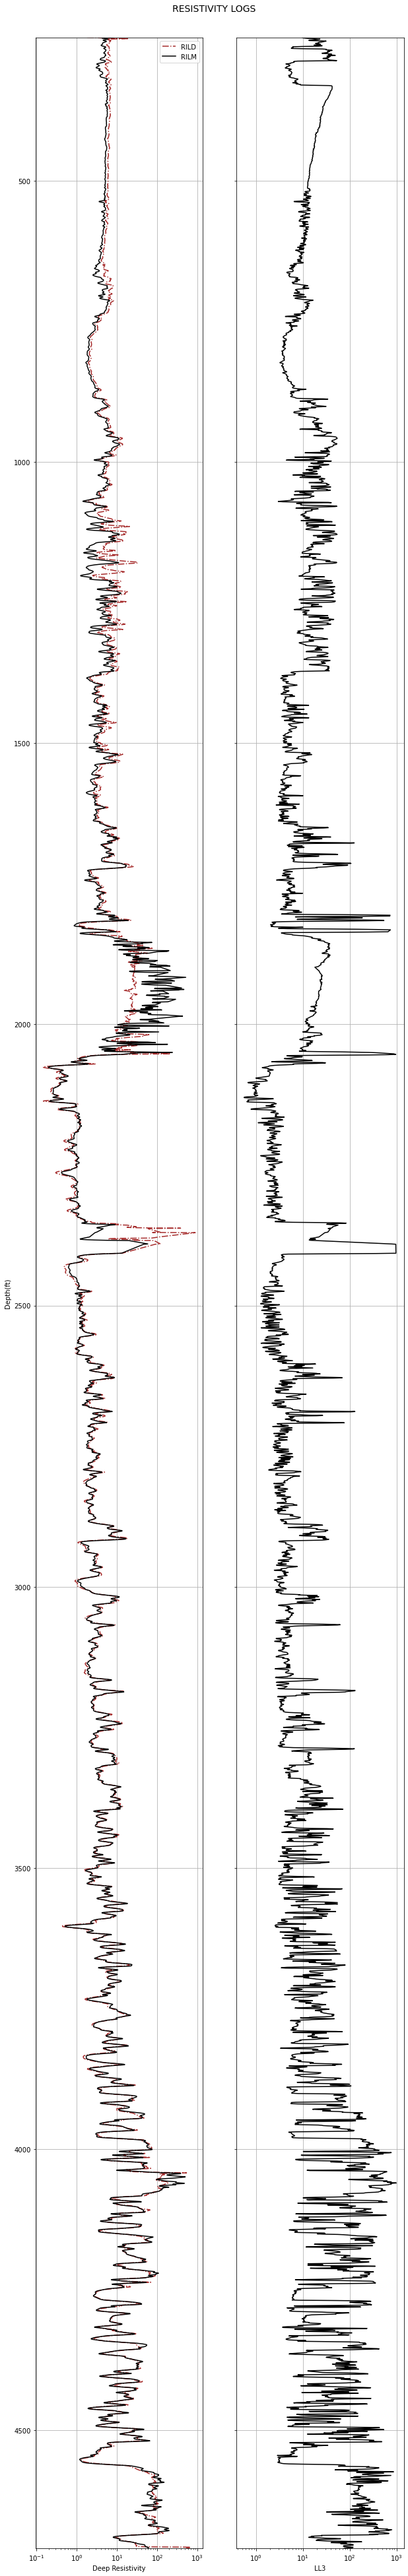

In [58]:
#Visualization

logs = logs.sort_values(by='Depth')
top = logs.Depth.min()
bot = logs.Depth.max()

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,70))

ax[0].plot(logs.RILD, logs.Depth,'-.', color='brown', label='RILD')
ax[0].plot(logs.RILM, logs.Depth, color='black', label ='RILM')
ax[1].plot(logs.RLL3, logs.Depth, color='black')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()

ax[0].set_xlabel("Deep Resistivity")
ax[0].legend()
ax[0].set_ylabel("Depth(ft)")
ax[1].set_xlabel("LL3")

#ax[0].set_yticklabels([])
ax[1].set_yticklabels([])

f.suptitle('RESISTIVITY LOGS', fontsize=14,y=0.89)